In [1]:
pca_x

,tissue,cell_type,disease
cell_id,,,
N105446_L-ATTGTTCCAAACGTGG,lamina propria of mucosa of colon,paneth cell,Crohn disease
N105446_L-TCGACGGGTGAGACCA,lamina propria of mucosa of colon,paneth cell,Crohn disease
N105446_L-AGTAACCGTTAAGGGC,lamina propria of mucosa of colon,paneth cell,Crohn disease
N105446_L-GCAGGCTTCGCTAAAC,lamina propria of mucosa of colon,goblet cell,Crohn disease
N105446_L-ATCTTCATCTGAGAGG,lamina propria of mucosa of colon,goblet cell,Crohn disease


In [2]:
umap_model_file = "/scratch/umap_model_trained1.pickle"
if not "umap_model" in globals():
    try:
        with open(umap_model_file, "rb") as f:
            umap_model = pickle.load(f)
            print("loaded")
    except:
        base_embeddings = np.load(f"{base_fname}.embeddings.npy")
        umap_model = umap.UMAP(random_state=42).fit(base_embeddings)
        with open(umap_model_file, "wb") as f:
            pickle.dump(umap_model, f)
            print("saved")
umap_model

loaded


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [3]:
if not "umap_x" in base_df.columns:
    base_embeddings = np.load(f"{base_fname}.embeddings.npy")
    base_df[["umap_x", "umap_y"]] = umap_model.transform(base_embeddings)
base_df.head()

,tissue,cell_type,disease,umap_x,umap_y
cell_id,,,,,
N105446_L-ATTGTTCCAAACGTGG,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.893022,6.114617
N105446_L-TCGACGGGTGAGACCA,lamina propria of mucosa of colon,paneth cell,Crohn disease,8.578289,5.733074
N105446_L-AGTAACCGTTAAGGGC,lamina propria of mucosa of colon,paneth cell,Crohn disease,7.900327,5.816499
N105446_L-GCAGGCTTCGCTAAAC,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.403781,6.108674
N105446_L-ATCTTCATCTGAGAGG,lamina propria of mucosa of colon,goblet cell,Crohn disease,12.387572,6.185776


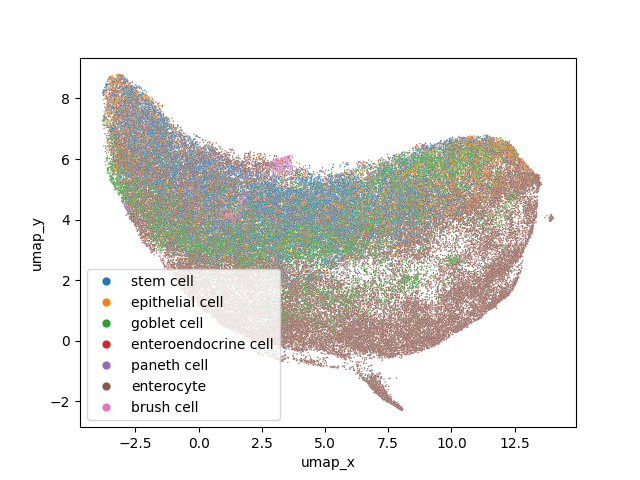

In [4]:
#sanity check: umap of the data
file_path = 'umap_colon_epithel1.png'
if not Path(file_path).exists():
    sns.scatterplot(data = base_df, x="umap_x", y="umap_y", hue="cell_type", s=1)
    plt.legend(fontsize=10, markerscale=6)
    plt.savefig(file_path)
    plt.close()
display(Image(filename=file_path))

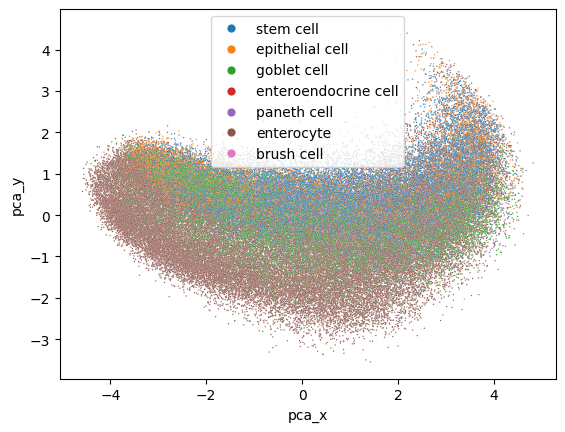

In [10]:
from sklearn.decomposition import PCA
if not 'pca' in globals():
    pca = PCA(n_components=2).fit(base_embeddings)
    base_df[["pca_x", "pca_y"]] = pca.transform(base_embeddings)
sns.scatterplot(data = base_df, x="pca_x", y="pca_y", hue="cell_type", s=1)
plt.legend(fontsize=10, markerscale=6)